# Análisis Exploratorio de Datos de Juzgado 10

In [21]:
from pathlib import Path
import pandas as pd
import sys
project_dir = Path().resolve().parents[0]
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

## 1. Carga de Datos

In [3]:
df_xlsx = pd.read_excel(str(project_dir) + '/data/juz10/'+ "set_de_datos_resoluciones_jpcyf10_2017.ods.xlsx")

Exploramos el contenido

In [4]:
df_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 13 columns):
N                           524 non-null float64
NRO. REGISTRO               534 non-null object
TOMO                        541 non-null float64
FECHA RESOLUCION            561 non-null object
NRO_EXPTE_JUSCABA           561 non-null object
MATERIA                     562 non-null object
ARTICULO_INFRINGIDO         562 non-null object
TIPO_DE_RESOLUCION          562 non-null object
OBJETO_DE_LA_RESOLUCION     562 non-null object
DETALLE                     406 non-null object
DECISION                    545 non-null object
LINK                        559 non-null object
Unnamed: 12                 1 non-null object
dtypes: float64(2), object(11)
memory usage: 57.2+ KB


Segun vemos los archivos excel son iguales, pasamos a hacer combinar

In [5]:
df_xlsx.head()

,N,NRO. REGISTRO,TOMO,FECHA RESOLUCION,NRO_EXPTE_JUSCABA,MATERIA,ARTICULO_INFRINGIDO,TIPO_DE_RESOLUCION,OBJETO_DE_LA_RESOLUCION,DETALLE,DECISION,LINK,Unnamed: 12
0,1.0,0708,5.0,09_01_2017,17545_16,penal,128,interlocutoria,cuestion_de_competencia,incompetencia_territorial,hace_lugar,https://drive.google.com/open?id=0B9wNhp3Gjjaz...,NaN
1,2.0,0709,5.0,12_01_2017,176_17,allanamientos_autonomos,ac7_08,definitiva,pedido_de_allanamiento,NaN,no_hace_lugar,https://drive.google.com/open?id=0B9wNhp3Gjjaz...,NaN
2,3.0,0710,5.0,16_01_2017,182_17,allanamientos_autonomos,ac7_08,definitiva,pedido_de_allanamiento,NaN,no_hace_lugar,https://drive.google.com/open?id=0B9wNhp3Gjjaz...,NaN
3,4.0,0710bis,5.0,12_01_2017,494_17,penal,181,interlocutoria,medidas_probatorias,pedido_de_allanamiento,no_hace_lugar,https://drive.google.com/open?id=0B9wNhp3Gjjaz...,NaN
4,5.0,0711,5.0,17_01_2017,566_17,contravencional,54,interlocutoria,medidas_cautelares,clausura,convalida,https://drive.google.com/open?id=0B9wNhp3Gjjaz...,NaN


## 2. Exploramos las distintas variables

### 2.1 Fechas

In [32]:
df_xlsx.dropna(subset=['FECHA RESOLUCION'], inplace=True)

In [35]:
df_xlsx['FECHA RESOLUCION']

0      09_01_2017
1      12_01_2017
2      16_01_2017
3      12_01_2017
4      17_01_2017
5      17_01_2017
6      13_01_2017
7      17_01_2017
8      17_01_2017
9      17_01_2017
10     17_01_2017
11     20_01_2017
12     19_01_2017
13     19_01_2017
14     20_01_2017
15     27_01_2017
16     31_01_2017
17     31_01_2017
18     29_12_2016
19     29_12_2016
20     16_01_2017
21     01_02_2017
22     01_02_2017
23     03_02_2017
24     03_02_2017
25     02_02_2017
26     07_02_2017
27     07_02_2017
28     06_02_2017
29     09_02_2017
          ...    
532    19_12_2017
533    19_12_2017
534    19_12_2017
535    19_12_2017
536    14_12_2017
537    20_12_2017
538    20_12_2017
539    20_12_2017
540    20_12_2017
541    21_12_2017
542    14_12_2017
543    26_12_2017
544    26_12_2017
545    26_12_2017
546    27_12_2017
547    26_12_2017
548    15_12_2017
549    27_12_2017
550    28_12_2017
551    28_12_2017
552    27_12_2017
553    27_12_2017
554    27_12_2017
555    29_12_2017
556    27_

In [38]:
df_xlsx['FECHA RESOLUCION'][1:10].apply(lambda x: datetime.strptime(x, '%d_%m_%Y').strftime('%m-%d-%Y'))

1    01-12-2017
2    01-16-2017
3    01-12-2017
4    01-17-2017
5    01-17-2017
6    01-13-2017
7    01-17-2017
8    01-17-2017
9    01-17-2017
Name: FECHA RESOLUCION, dtype: object

In [ ]:
#TODO: FIX Fecha

In [7]:
df_xlsx['FECHA RESOLUCION'].groupby(df_xlsx['FECHA RESOLUCION'].dt.month).count().plot(kind="bar")

AttributeError: Can only use .dt accessor with datetimelike values

In [79]:
df_xlsx.Fecha.min()

Timestamp('2017-10-02 00:00:00')

In [80]:
df_xlsx.Fecha.max()

Timestamp('2018-12-10 00:00:00')

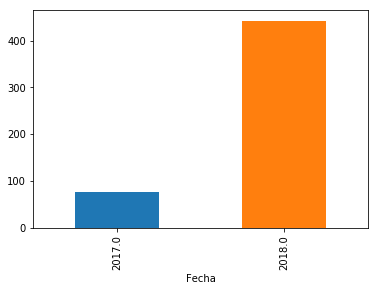

In [83]:
df_xlsx.Fecha.groupby(df_xlsx["Fecha"].dt.year).count().plot(kind="bar")

### 2.2 Distribución de Cusa

In [84]:
df_xlsx.Causa.shape

(528,)

Estudiamos cuantas causas tienen expedientes que aparecen mas de una ves en la tabla.

In [85]:
df_xlsx.groupby('Causa', sort=True).size().to_frame('count').groupby('count').size().to_frame('casos')

,casos
count,
2,195
4,23
6,3
8,1
10,1
